<a href="https://colab.research.google.com/github/Kusuma-1309/Neural-Networks-and-Deep-Learning/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [11]:
pip install ultralytics


In [12]:
# detect_animals_yolo.py
# Simple script that asks the user for an image path, runs YOLOv8,
# and reports/saves any detected animals.

import cv2
from ultralytics import YOLO
import numpy as np
import os

# --- Set this to True if running inside a notebook and you want inline display ---
show_inline = False

# --- Animal classes (COCO names) we consider "animals" here ---
ANIMAL_CLASSES = {
    "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe"
}

# --- Utility to draw labeled boxes on the image ---
def draw_boxes(image, boxes, confs, cls_ids, names):
    for (x1, y1, x2, y2), conf, cid in zip(boxes, confs, cls_ids):
        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        cls_name = names[int(cid)]
        label = f"{cls_name} {conf:.2f}"
        # color chosen deterministically by class id so same class has same color
        rng = np.random.RandomState(int(cid))
        color = tuple(int(c) for c in rng.randint(0, 200, size=3))
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        (tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
        cv2.rectangle(image, (x1, y1 - th - 6), (x1 + tw, y1), color, -1)
        cv2.putText(image, label, (x1, y1 - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)

def main():
    # Ask user for image path
    img_path = input("Enter image file path (e.g. room.jpg or /path/to/image.jpg): ").strip()
    if not img_path:
        print("No path given — exiting.")
        return
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        return

    # Optional: ask confidence threshold
    try:
        conf_thr = float(input("Enter confidence threshold (0.0 - 1.0, default 0.25): ") or 0.25)
    except ValueError:
        conf_thr = 0.25

    # Load model (yolov8n is small and fast)
    print("Loading YOLO model (yolov8n)... (will download weights on first run)")
    model = YOLO("yolov8n.pt")

    # Run inference (single image). device='cpu' by default; use device='0' for GPU (if available)
    results = model(img_path, imgsz=640, conf=conf_thr)  # returns list-like results

    # Read original image with OpenCV for drawing
    img = cv2.imread(img_path)
    if img is None:
        print("Failed to read the image after detection. Exiting.")
        return

    r = results[0]  # single image result
    detected_animals = []  # list of tuples (name, confidence, box)

    # r.boxes may be empty; check attributes safely
    if hasattr(r, "boxes") and len(r.boxes) > 0:
        boxes = r.boxes.xyxy.cpu().numpy()   # x1,y1,x2,y2
        confs = r.boxes.conf.cpu().numpy()   # confidences
        cls_ids = r.boxes.cls.cpu().numpy()  # class ids
        names = model.names                   # mapping id -> class name

        # iterate detections and collect animals
        for box, conf, cid in zip(boxes, confs, cls_ids):
            cls_name = names[int(cid)]
            if cls_name in ANIMAL_CLASSES:
                detected_animals.append((cls_name, float(conf), box))

        # draw all boxes (optional: draw only animals by filtering)
        if len(detected_animals) > 0:
            # If you want to draw only animals uncomment next lines:
            # animal_boxes = [d[2] for d in detected_animals]
            # animal_confs = [d[1] for d in detected_animals]
            # animal_ids = [list(names.keys())[list(names.values()).index(d[0])] for d in detected_animals]
            # draw_boxes(img, animal_boxes, animal_confs, animal_ids, names)
            # Simpler: draw all detections but animals will be listed below
            draw_boxes(img, boxes, confs, cls_ids, names)
        else:
            # still draw detections so user can see non-animal detections too
            draw_boxes(img, boxes, confs, cls_ids, names)
    else:
        print("No objects detected in the image.")

    # Save annotated image
    out_path = "annotated_output.jpg"
    cv2.imwrite(out_path, img)
    print(f"\nAnnotated image saved as: {out_path}")

    # Print detected animals summary
    if detected_animals:
        print("\nAnimals detected:")
        for name, conf, _ in detected_animals:
            print(f" - {name}: {conf:.2f}")
    else:
        print("\nNo animals detected among the recognized classes.")

    # If running in notebook and user wants inline display
    if show_inline:
        try:
            from IPython.display import display, Image as IPyImage
            display(IPyImage(out_path))
        except Exception as e:
            print("Could not display inline:", e)

    # Optionally open the image in a window (works locally)
    view = input("Open result image now? (y/N): ").strip().lower()
    if view == "y":
        try:
            # convert BGR to RGB for nicer display in some viewers
            cv2.imshow("Detected", img)
            print("Press any key in the image window to close it.")
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        except Exception as e:
            print("Could not open a GUI window (maybe you're in headless environment):", e)

if __name__ == "__main__":
    main()


Enter image file path (e.g. room.jpg or /path/to/image.jpg): /content/a.jpg
Enter confidence threshold (0.0 - 1.0, default 0.25): 
Loading YOLO model (yolov8n)... (will download weights on first run)

image 1/1 /content/a.jpg: 480x640 1 elephant, 1 kite, 145.1ms
Speed: 2.9ms preprocess, 145.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

Annotated image saved as: annotated_output.jpg

Animals detected:
 - elephant: 0.87
Open result image now? (y/N): y
Could not open a GUI window (maybe you're in headless environment): cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



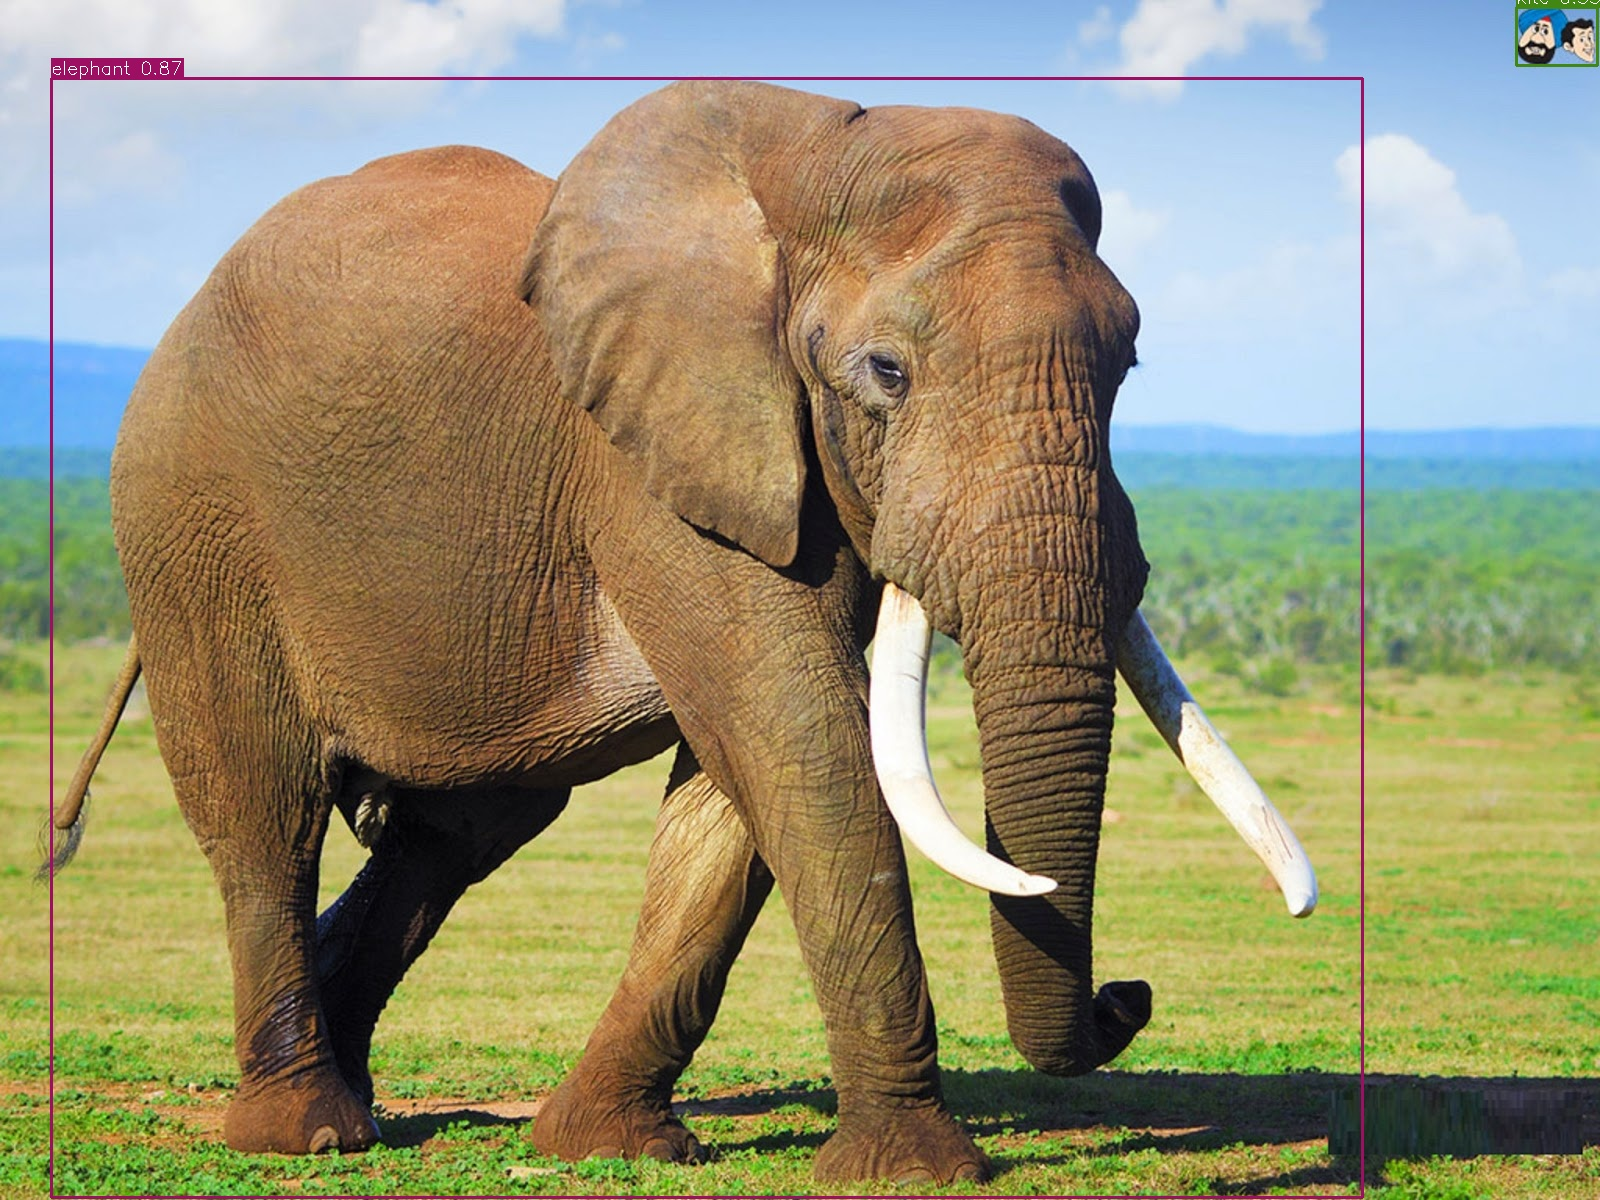

In [13]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("annotated_output.jpg")
cv2_imshow(img)
